<a href="https://colab.research.google.com/github/Naveen131/Machine-learning/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data.csv')
df['Amount'] = df['Amount'].str.replace('$','').str.replace(',','')
df['Amount'] = pd.to_numeric(df['Amount'])
print(df.head())

  BranchName  Week  DayWeek  Day  Month  Hour Transaction_Type  Units  Amount
0    MyStore     1        3    2      1     9             Card      3   54.00
1    MyStore     1        3    2      1    10             Cash      7  -17.80
2    MyStore     1        3    2      1    10             Card      7   41.99
3    MyStore     1        3    2      1    11             Card     20  412.50
4    MyStore     1        3    2      1    12             Cash      1  -18.00


In [4]:
# Remove unwanted 
df.drop('BranchName',axis=1, inplace=True)
df.head()

,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,1,3,2,1,9,Card,3,54.00
1,1,3,2,1,10,Cash,7,-17.80
2,1,3,2,1,10,Card,7,41.99
3,1,3,2,1,11,Card,20,412.50
4,1,3,2,1,12,Cash,1,-18.00


In [5]:
df.shape

(4100, 8)

In [6]:
df.describe()


,Week,DayWeek,Day,Month,Hour,Units,Amount
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000
mean,34.017805,4.183902,15.812195,8.231463,12.949024,12.779512,35.237046
std,14.714289,1.967864,8.810817,3.396586,2.631853,17.854968,183.538724
min,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,-1041.800000
25%,29.000000,3.000000,8.000000,7.000000,11.000000,3.000000,-47.000000
50%,37.000000,4.000000,16.000000,9.000000,13.000000,8.000000,-2.385000
75%,45.000000,6.000000,23.000000,11.000000,15.000000,16.000000,99.512500
max,53.000000,7.000000,31.000000,12.000000,19.000000,274.000000,1487.000000


## Distribution Plot

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


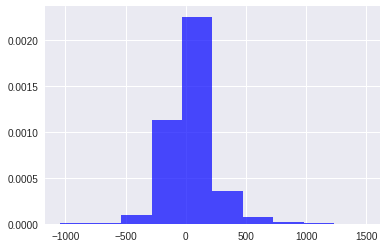

In [7]:
num_bins = 10
plt.hist(df['Amount'], num_bins, normed=1, facecolor='blue', alpha=0.7)
plt.show()


The data varies from `-1000` to `1000` sums up how much the amount varies.

## Sales by Month, Day and Hour

Month
1     604
7     606
8     572
9     580
10    581
11    587
12    570
dtype: int64


Text(0,0.5,'Total Sales')

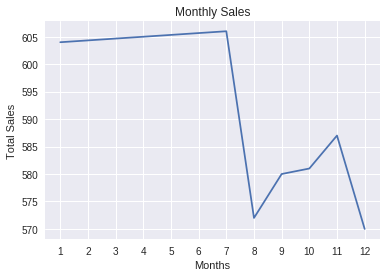

In [8]:
# By Month
sales_by_month = df.groupby('Month').size()
print(sales_by_month)
#Plotting the Graph
plot_by_month = sales_by_month.plot(title='Monthly Sales',xticks=(1,2,3,4,5,6,7,8,9,10,11,12))
plot_by_month.set_xlabel('Months')
plot_by_month.set_ylabel('Total Sales')

Text(0,0.5,'Total Sales')

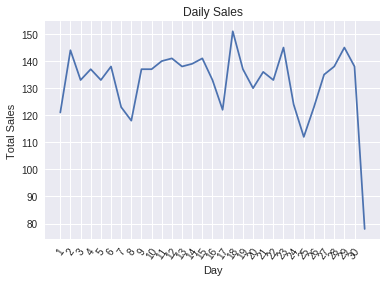

In [9]:
# By Day
sales_by_day = df.groupby('Day').size()
plot_by_day = sales_by_day.plot(title='Daily Sales',xticks=(range(1,31)),rot=55)
plot_by_day.set_xlabel('Day')
plot_by_day.set_ylabel('Total Sales')

As per this, 18th day was the best day as 151 units were sold in that day and sales drastically dropped by the end of the month. May be members get tired or bored? :-) 

Text(0,0.5,'Total Sales')

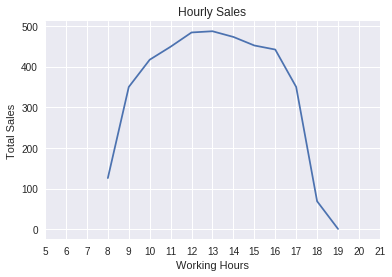

In [10]:
sales_by_hour = df.groupby('Hour').size()
plot_by_hour = sales_by_hour.plot(title='Hourly Sales',xticks=(range(5,22)))
plot_by_hour.set_xlabel('Working Hours')
plot_by_hour.set_ylabel('Total Sales')

Stores starts around 7 AM in the morning. Majority of the customers come in afternoon. The frequency gets quite low during closing time.